In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

from wmb_browser.backend.dataset import Dataset, cemba
from wmb_browser.backend.genome import mm10
from wmb_browser.backend.colors import color

import joblib
import pandas as pd
import xarray as xr
import plotly.express as px

In [2]:
cemba.metadata_names

{'CEMBARegion',
 'CellClass',
 'CellGroup',
 'CellSubClass',
 'Col384',
 'DissectionRegion',
 'FinalmCReads',
 'InputReads',
 'IntID',
 'MajorRegion',
 'Plate',
 'PlateNormCov',
 'Row384',
 'Sample',
 'Slice',
 'SubRegion',
 'Technology',
 'mCCCFrac',
 'mCGFrac',
 'mCHFrac'}

In [3]:
plot_data = cemba.get_plot_data('l1_tsne', 'CellSubClass', 'gene_mch:Gad1', 'gene_mcg:Cux2', sample=3000)

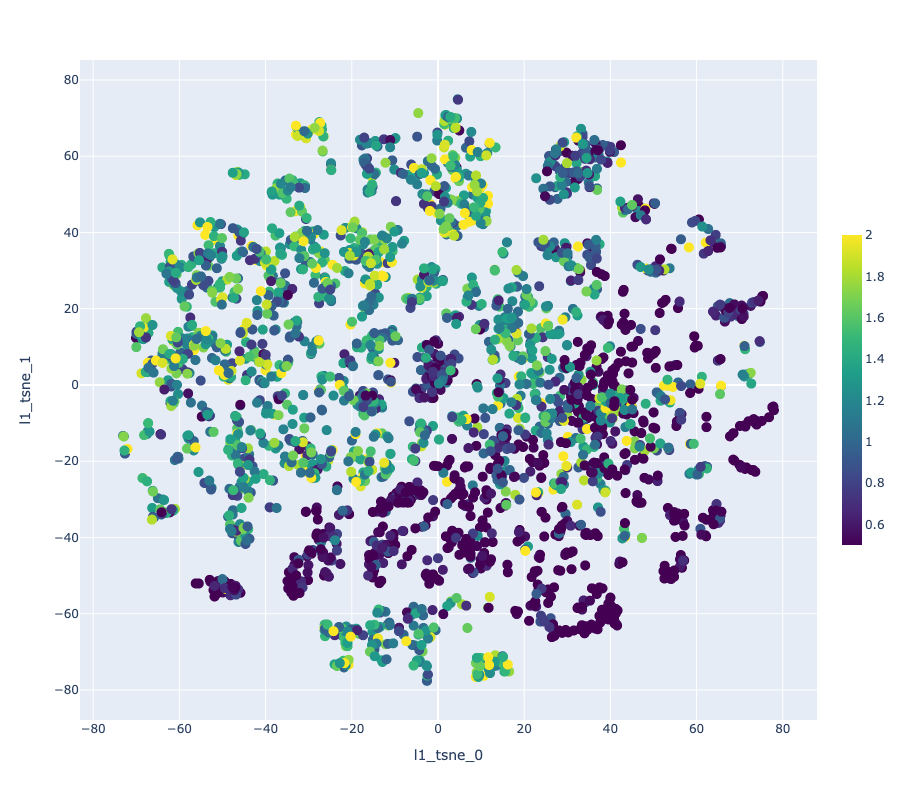

In [4]:
fig = px.scatter(plot_data, 
                 x='l1_tsne_0', 
                 y='l1_tsne_1', 
                 color='gene_mch:ENSMUSG00000070880', 
                 hover_data=['gene_mch:ENSMUSG00000070880', 'CellSubClass'],
                 color_continuous_scale='viridis',
                 range_color=(0.5, 2)
                )
fig.layout.width = 820
fig.layout.height = 800

fig.update_traces(marker=dict(size=10))
fig.update_traces(hovertemplate='Gad1 mCH = %{marker.color:.2f}<br>Cell SubClass = %{customdata[1]}<extra></extra>')
fig.update_layout(coloraxis_colorbar=dict(thickness=20, len=0.5, y=0.5, title=None))

fig.show()

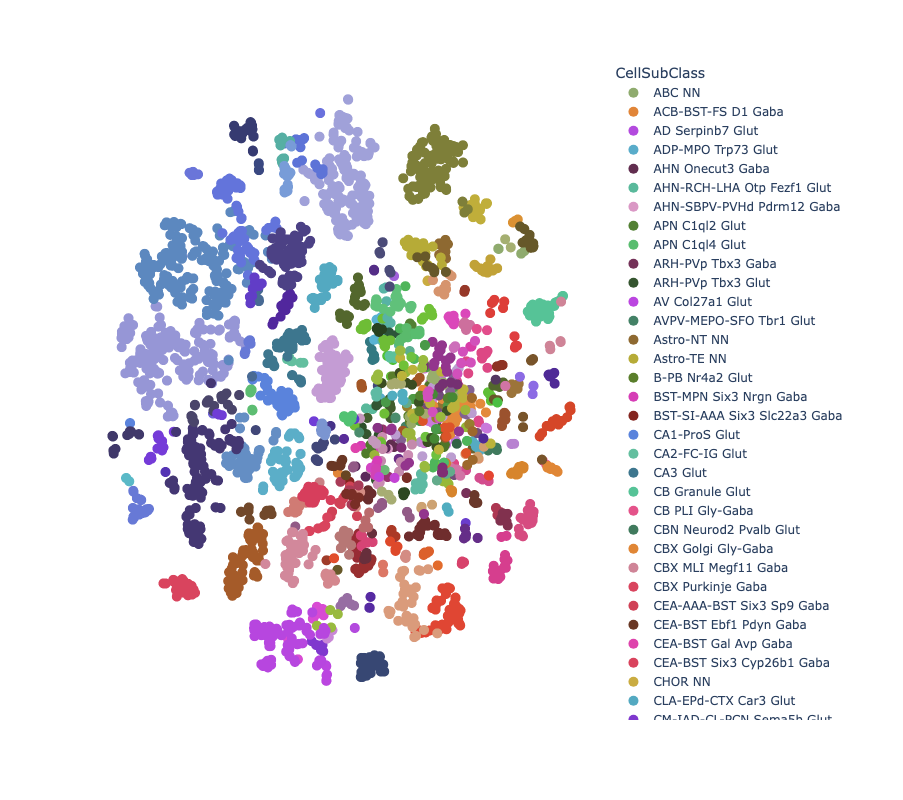

In [35]:
fig = px.scatter(plot_data.sort_values('CellSubClass'), 
                 x='l1_tsne_0', 
                 y='l1_tsne_1', 
                 color='CellSubClass', 
                 hover_data=['gene_mch:ENSMUSG00000070880', 'CellSubClass'],
                 color_discrete_map=p
                )
fig.layout.width = 820
fig.layout.height = 800

fig.update_layout(
    xaxis_title='',
    yaxis_title='',
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend=dict(itemwidth=30)
)

fig.update_traces(marker=dict(size=10))
fig.update_traces(hovertemplate='Gad1 mCH = %{customdata[0]}<br>Cell SubClass = %{customdata[1]}<extra></extra>')

fig.show()

In [20]:
palette = color.get_colors('subclass')
cats = plot_data['CellSubClass'].unique()
use_palettes = {k: v for k, v in palette.items() if k in cats}
missing_color='#D3D3D3'

for cat in cats:
    if cat not in use_palettes:
        use_palettes[cat] = missing_color
        print(cat)

In [23]:
plot_data['CellSubClass'] = plot_data['CellSubClass'].astype(str)